## Data Exploration
Before thinking about which regression techniques or classification algorithms to apply, you need to first understand the dataset.

First, we will import relevant libraries and datasets. -- Pandas is used for creating and manipulating datasets -- Numpy is used for computing value -- Seaborn and Matplotlib are used for creating visualization

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Import dataset
contacts = pd.read_csv(r"D:\Data set\Dublin_anb_market_data\datasets\contacts.tsv", sep="\t")
searches = pd.read_csv(r"D:\Data set\Dublin_anb_market_data\datasets\searches.tsv", sep="\t")

In [3]:
#Find % of null values in datasets 
print('Contacts')
print((contacts.isna().sum()/len(contacts)*100), '\n')
print('searches')
print((searches.isna().sum()/len(searches))*100)

Contacts
id_guest           0.000000
id_host            0.000000
id_listing         0.000000
ts_contact_at      0.000000
ts_reply_at        7.720823
ts_accepted_at    53.636712
ts_booking_at     72.210150
ds_checkin         0.000000
ds_checkout        0.000000
n_guests           0.000000
n_messages         0.000000
dtype: float64 

searches
ds                       0.000000
id_user                  0.000000
ds_checkin              33.156113
ds_checkout             33.156113
n_searches               0.000000
n_nights                33.156113
n_guests_min             0.000000
n_guests_max             0.000000
origin_country           0.000000
filter_price_min        62.722109
filter_price_max        62.722109
filter_room_types       54.694015
filter_neighborhoods    96.233595
dtype: float64


The neighborhood column in searches has 96.2336% of null values. This could lead to inaccurate assumptions about the demand from people. When looking through the column, 'City Centre' was a common choice, so this should be investigated further with more data.

### searches Dataset

In [4]:
searches.head()

,ds,id_user,ds_checkin,ds_checkout,n_searches,n_nights,n_guests_min,n_guests_max,origin_country,filter_price_min,filter_price_max,filter_room_types,filter_neighborhoods
0,2014-10-01,0000af0a-6f26-4233-9832-27efbfb36148,2014-10-09,2014-10-12,16,3.0,2,2,IE,0.0,67.0,",Entire home/apt,Entire home/apt,Private room,...",NaN
1,2014-10-01,0000af0a-6f26-4233-9832-27efbfb36148,2014-10-09,2014-10-19,3,10.0,1,2,IE,0.0,67.0,NaN,NaN
2,2014-10-01,000cd9d3-e05b-4016-9e09-34a6f8ba2fc5,NaN,NaN,1,NaN,1,1,GB,NaN,NaN,NaN,NaN
3,2014-10-01,000cd9d3-e05b-4016-9e09-34a6f8ba2fc5,2014-11-08,2014-11-10,11,2.0,1,2,GB,NaN,NaN,",Entire home/apt",NaN
4,2014-10-01,001c04f0-5a94-4ee0-bf5d-3591265256de,NaN,NaN,1,NaN,1,1,IE,NaN,NaN,NaN,NaN


In [5]:
#drop filter_neighborhoods column
searches = searches.drop(columns=['filter_neighborhoods'])

Certain models can be more accurate or process faster if its variables had more suitable data types

In [6]:
#Checking the data types of the columns in the searches dataset
searches.dtypes

ds                    object
id_user               object
ds_checkin            object
ds_checkout           object
n_searches             int64
n_nights             float64
n_guests_min           int64
n_guests_max           int64
origin_country        object
filter_price_min     float64
filter_price_max     float64
filter_room_types     object
dtype: object

As seen, the date columns (ds, ds_checkin, ds_checkout) are object types. These columns can be converted to DateTime type for easier manipulation.

I was wondering if how soon people want their rooms could yield any useful information. I would calculate this by finding the difference between the ds (date search) column and the ds_checkin (date check-in) column. I believe the distribution of this column would be useful since we can find how soon people start planning their trips. This could lead to better business decisions.

In [7]:
#Manipulation of searches dataset

#Convert date column to datetime data type for easier analysis

searches["ds"] = pd.to_datetime(searches["ds"])
searches["ds_checkin"] = pd.to_datetime(searches["ds_checkin"])
searches["ds_checkout"] = pd.to_datetime(searches["ds_checkout"])

In [8]:
searches["length_preperation"] = searches["ds_checkin"] - searches["ds"]

In [9]:
searches.dtypes

ds                     datetime64[ns]
id_user                        object
ds_checkin             datetime64[ns]
ds_checkout            datetime64[ns]
n_searches                      int64
n_nights                      float64
n_guests_min                    int64
n_guests_max                    int64
origin_country                 object
filter_price_min              float64
filter_price_max              float64
filter_room_types              object
length_preperation    timedelta64[ns]
dtype: object

The describe function displays a 8 number summary to understand the distribution of the dataset. This is helpful to understand if there are any obvious skewness or outliers in the dataset that could be fixed quickly.

In [10]:
searches.describe()

,n_searches,n_nights,n_guests_min,n_guests_max,filter_price_min,filter_price_max,length_preperation
count,35737.000000,23888.000000,35737.000000,35737.000000,13322.000000,1.332200e+04,23888
mean,9.206565,7.672765,1.742955,2.105857,8.470200,9.019063e+07,51 days 08:11:53.730743469
std,17.348746,21.557614,1.460440,1.817358,53.987679,2.978482e+08,65 days 18:56:19.491940518
min,1.000000,0.000000,1.000000,1.000000,0.000000,9.000000e+00,-1 days +00:00:00
25%,1.000000,2.000000,1.000000,1.000000,0.000000,8.600000e+01,10 days 00:00:00
50%,4.000000,3.000000,1.000000,2.000000,0.000000,1.390000e+02,26 days 00:00:00
75%,10.000000,5.000000,2.000000,2.000000,0.000000,3.010000e+02,67 days 00:00:00
max,448.000000,399.000000,16.000000,16.000000,1250.000000,1.073742e+09,604 days 00:00:00


This shows that the number of guests is usually 1 or 2. This can be understood since even at 75% the n_guests_min and n_guests_max is 2 and at 25% are 1. This leads to believe that smaller accommodations are preferred.

Now to calculate the skewness of the dataset. Skewness is where the distribution of the values leans towards a specific side from the normal distribution. For example, if a lot of students scored above 90 in a test on a 0-100 range, the graph will be skewed to the right.

The problem with skewness is most models and diagnostic tests assume normality (normal distribution). Here we calculate the skewness of the dataset through the Fisher-Pearson coefficient.

In [11]:
#Calculate skewness in searches dataset

display(searches.skew(axis = 0, numeric_only = True, skipna = True))

n_searches           7.509258
n_nights             9.942364
n_guests_min         3.583798
n_guests_max         3.148548
filter_price_min    11.087745
filter_price_max     2.999833
dtype: float64

All numeric columns have a Fisher-Pearson coefficient value greater than 1. This results in a positive skewness. With more time, I would have used a transformation method such as log transformation to reduce the skewness.

TIP
In a recruitment process, recruiters will typically give you a time limit ranging from 1 hour to 72 hours to complete a take-home assignment. Due to this time limit, there may be certain models you want to implement or apply a transformation to the dataset. It is important to be vigilant about time and follow the directions as strict as possible. If you realize there is a certain component you want to add but don't have enough time, apply it as a code in your solution.

For this AirBnb project, all the columns have a Fisher-Pearson coefficient value greater than 1. This means the data is skewed. I could use a transformation technique to fix this problem and create a more accurate model. Unfortunately there is a 6h time limit, so I can not implement it. I would write a comment about this (as I did right above) to indicate I have indicated a problem and would apply this solution if I had more time.

Distributions
Now let's find the distribution of values in the columns.

First, let's start with the minimum and maximum guests. Here we can find the number of people searched for when booking rooms.

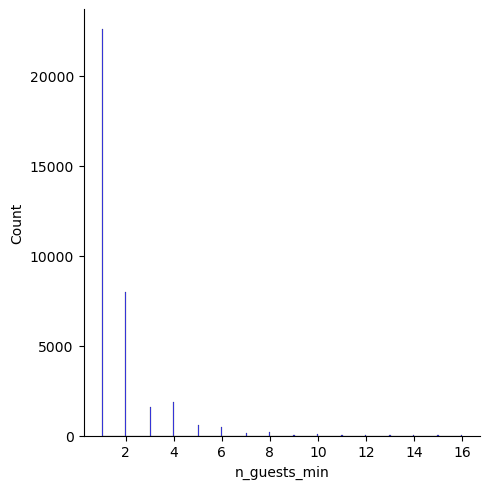

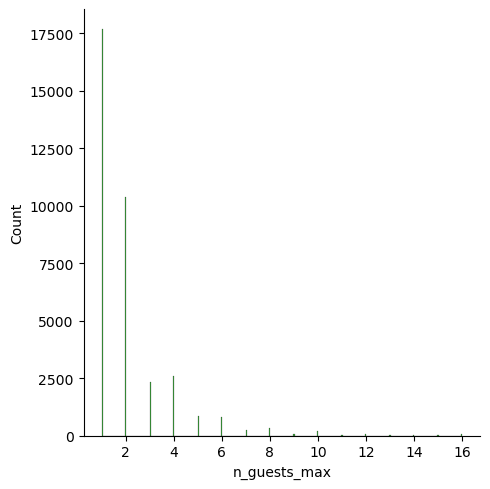

In [12]:
# Distribution plot of n_guests_min and n_guests_max
sns.displot(searches, x="n_guests_min", color = "blue")
sns.displot(searches, x="n_guests_max", color="green")
plt.show()

Both have similar distributions with 1 being the most popular option and 2 being the next popular option. This leads me to believe smaller accommodations would be a good investment for in Dublin.

Next, let's find out when are people making these searches. With this we could calculate when people start thinking about going to Dublin for vacation for ads.

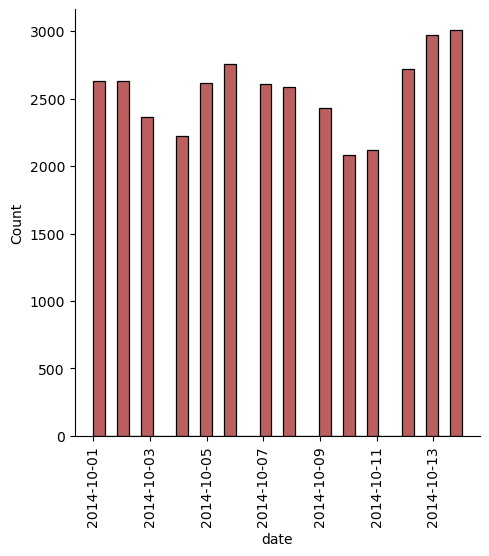

In [13]:
#When were searches conducted

sns.displot(searches, x="ds", color="brown")
plt.xticks(rotation=90)
plt.xlabel("date")
plt.show()

Noticed all date searches were between October 1st to October 14th. No major variation in when search was conducted between these dates.

Next let's understand what is the maximum price people are willing to pay for a room. Airbnb's website automatically sets the maximum price as 1073742000 and certain prices are so low in the count that it is negligible. So we set the maximum price with a relevant count as 600. 600 was chosen as the upper limit since only 5.31% of the dataset has values greater than 600.

Filter_price_max was chosen instead of filter_price_min due to the minimum set as $10 on Airbnb's website.

In [14]:
#Percentage of dataset with a filter_price_max above 600

print(len(searches[searches["filter_price_max"]>600])/len(searches["filter_price_max"])*100,"%")

5.311022189887232 %


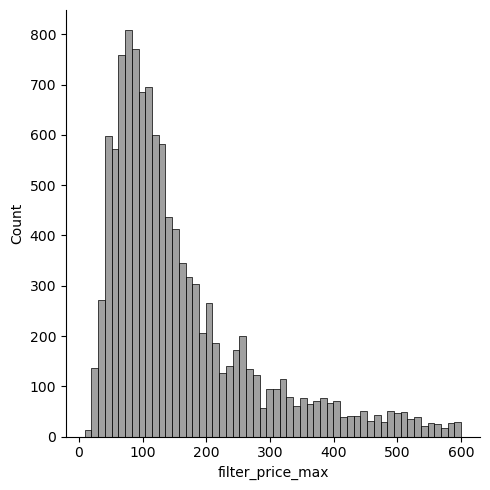

In [15]:
#Distribution of filter_price_max of searches

#Removing the set upper limit
search_max_price_removed = searches[searches["filter_price_max"]<=600]
sns.displot(search_max_price_removed, x="filter_price_max", color="grey")
plt.show()

9.396423874415872 % 



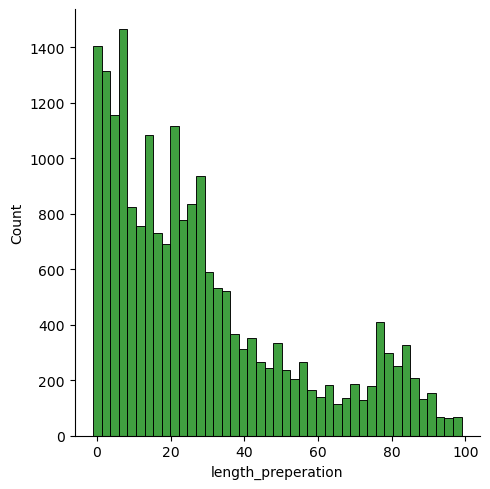

In [16]:
#Distribution of length_preperation of searches

#Percentage of dataset beyond 100 days
distribution = searches["length_preperation"] / np.timedelta64(1, 'D')
print(len(distribution[distribution > 100])/len(distribution)*100, '% \n')

#Remove values beyond 100 days
distribution = distribution[distribution<100]

#Distribution plot of length_preperation column
sns.displot(x=distribution, color="green")
plt.show()

Based on this data, around 37% of people search for a room within 2 weeks

* 23.7% search for rooms within a week

* 13.46% search for rooms between 1-2 weeks

* 12.51% search for rooms between 2-3 weeks

Now let's find the distribution of the number of nights people want to stay.

Of course, as before, we have to find the upper limit. In this case, 4.74% of the dataset exists beyond 20 days, so we chose 20 as an upper limit.

4.737387021854101 % 



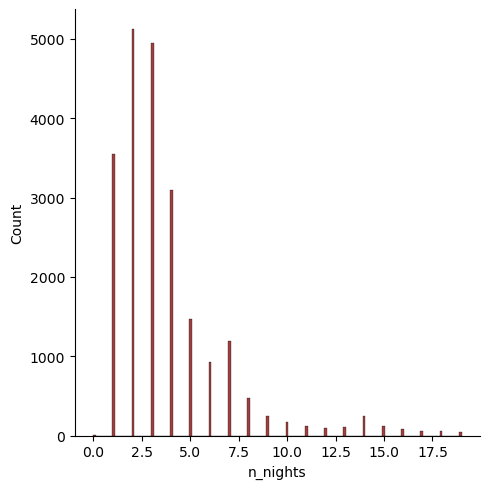

In [17]:
#Distribution of n_nights of searches

#Percentage of dataset beyond 20 nights
print(len(searches[searches['n_nights'] > 20])/len(searches['n_nights'])*100, '% \n')

#Remove n_nights beyond 20 days
searches_within_twenty = searches[searches['n_nights'] < 20]

#Distribution plot of length_preperation column
sns.displot(searches_within_twenty, x="n_nights", color="maroon")
plt.show()

Around 70% of people want to stay between 1-4 days, mostly 2 or 3

People generally don’t want to stay for more than a week (only 15% want to stay more than a week)

Here we are going to calculate when people want to take a trip to Dublin.

We use the check-in date to calculate this.

Used only the check-in month, cause checkout is usually within 5 days. The 75% of n_nights is 5, so assumed 5 days after the check-in date people usually checkout.

In [18]:
#8 number summary of n_nights column

searches_within_twenty['n_nights'].describe()

count    22143.000000
mean         3.766924
std          2.968842
min          0.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         19.000000
Name: n_nights, dtype: float64

In [19]:
#Distribution of months of ds_checkin of searches

checkin_month = pd.DatetimeIndex(searches["ds_checkin"]).month

In [20]:
searches.columns

Index(['ds', 'id_user', 'ds_checkin', 'ds_checkout', 'n_searches', 'n_nights',
       'n_guests_min', 'n_guests_max', 'origin_country', 'filter_price_min',
       'filter_price_max', 'filter_room_types', 'length_preperation'],
      dtype='object')

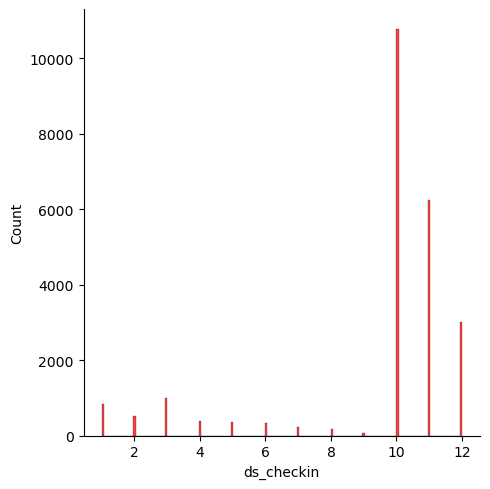

In [21]:
sns.displot(checkin_month, color="red")
plt.show()

In [96]:
# Sum of each month checkin 
a = checkin_month.dropna().value_counts().reset_index()
a = a.sort_values('index').reset_index()
a = a.drop(['level_0'], axis=1)
a['index'] = a['index'].astype(int)
a

,index,ds_checkin
0,1,829
1,2,520
2,3,986
3,4,381
4,5,369
5,6,341
6,7,215
7,8,164
8,9,78
9,10,10761


In [97]:
# Percentage checkin of each of each month to total checkin
i=0
print('Month','\t','Percentage')
for item in a["ds_checkin"]:
    perc = item/a["ds_checkin"].sum()
    print(a["index"][i],'\t',perc*100)
    i+=1


Month 	 Percentage
1 	 3.470361687876758
2 	 2.1768251841929
3 	 4.127595445411923
4 	 1.5949430676490288
5 	 1.5447086403215005
6 	 1.4274949765572673
7 	 0.9000334896182183
8 	 0.6865371734762223
9 	 0.32652377762893503
10 	 45.04772270596115
11 	 26.09678499665104
12 	 12.600468854655055


83.74% of searches were in the October-December

Breakdown:

* 45.05% in October
* 26.1% in November
* 12.6% in December
Now I want to understand which are the most common type of rooms searched for.

In [99]:
#Types of rooms searched for
searches["filter_room_types"].unique()[:15]

array([',Entire home/apt,Entire home/apt,Private room,Private room', nan,
       ',Entire home/apt',
       'Entire home/apt,Entire home/apt,Private room,Private room',
       'Entire home/apt', ',Shared room,Private room',
       'Entire home/apt,Private room,Shared room,Private room,Shared room',
       'Private room', 'Entire home/apt,Private room', ',Private room',
       ',Entire home/apt,Private room',
       ',Entire home/apt,Private room,Private room',
       'Entire home/apt,Private room,Shared room',
       ',Entire home/apt,Entire home/apt,Private room',
       ',Entire home/apt,Entire home/apt,Shared room,Shared room'],
      dtype=object)

searches['filter_room_types'].unique()Most of the room types requested were entire home/apt and private rooms sometimes shared rooms. If given more time, I would have cleaned this column since most filter values are repeated within the same cell. On the Airbnb website, there are only 4 values in the type of place:

* Entire Place
* Private Room
* Hotel Room
* Shared Room
So searching how often these 4 strings occur would be how I go about it

There is also the origin_country column which indicates which country the search came from. We could find the most common countries searched from.

In [25]:
#Find top 15 countries where searches originate from

#Group by origin country and finding the count of each country
search_origin = searches["origin_country"].value_counts().reset_index()
search_origin.rename(columns={"index":"Country","origin_country":"count"},inplace=True)

search_origin = search_origin.sort_values("count", ascending=False) #Sort count in descending order
x = search_origin.nlargest(15,"count") #Find the 15 largest values
x["percentage"] = [item/search_origin["count"].sum()*100 for item in x["count"] ]
x

,Country,count,percentage
0,IE,6608,18.490640
1,US,5811,16.260458
2,GB,4832,13.521001
3,FR,3444,9.637071
4,IT,2333,6.528248
5,DE,2170,6.072138
6,ES,1759,4.922070
7,CA,1085,3.036069
8,AU,962,2.691888
9,NL,843,2.358900


Ireland, the US, and Great Britain comprise 48% of searches.

Dublin destinations could be promoted within these 3 countries more for the winter months

### contacts Dataset

After analyzing the searches dataset, we have to start analyzing the contacts dataset. First we'll start with the data types of the dataset.

In [26]:
#Datatypes of contacts dataset

contacts.dtypes

id_guest          object
id_host           object
id_listing        object
ts_contact_at     object
ts_reply_at       object
ts_accepted_at    object
ts_booking_at     object
ds_checkin        object
ds_checkout       object
n_guests           int64
n_messages         int64
dtype: object

In [27]:
contacts.head()

,id_guest,id_host,id_listing,ts_contact_at,ts_reply_at,ts_accepted_at,ts_booking_at,ds_checkin,ds_checkout,n_guests,n_messages
0,000dfad9-459b-4f0b-8310-3d6ab34e4f57,13bb24b8-d432-43a2-9755-5ea11b43bb69,21d2b1a2-fdc3-4b4c-a1f0-0eaf0cc02370,2014-10-04 16:26:28.0,2014-10-04 16:26:28.0,2014-10-04 16:26:28.0,2014-10-04 16:26:28.0,2014-10-13,2014-10-15,2,13
1,00197051-c6cb-4c3a-99e9-86615b819874,46aa3897-9c00-4d76-ac66-a307593d0675,fb5ed09a-9848-4f2c-b2ef-34deb62164fb,2014-11-04 09:10:03.0,2014-11-04 09:45:50.0,2014-11-04 09:45:50.0,2014-11-04 12:20:46.0,2014-11-27,2014-11-30,1,10
2,0027538e-aa9e-4a02-8979-b8397e5d4cba,6bbb88ca-db66-48c5-9c4b-862f7706284a,d3871da6-8012-4dc4-b508-c91f2c10c297,2014-10-10 12:02:50.0,2014-10-10 15:07:01.0,NaN,NaN,2014-10-17,2014-10-19,2,3
3,0027538e-aa9e-4a02-8979-b8397e5d4cba,8772bc85-a9b7-4d85-a52d-41f3620c2912,0d9b5583-8053-4b67-adfe-8c29eb12efed,2014-10-10 15:23:53.0,NaN,NaN,NaN,2014-10-17,2014-10-19,2,2
4,0027538e-aa9e-4a02-8979-b8397e5d4cba,ac162061-55e2-4072-ac91-2e080f9581f2,ec68e0af-b0f2-42c7-b6f8-d41061c083ff,2014-10-10 15:22:26.0,2014-10-10 15:24:26.0,2014-10-10 15:24:26.0,2014-10-10 15:52:42.0,2014-10-17,2014-10-19,2,14


This shows that multiple columns need to be converted to DateTime data type

These columns need to be converted

* ts_contact_at
* ts_reply_at
* ts_accepted_at
* ts_booking_at
* ds_checkin
* ds_checkout
* accepted

And create length_stay in the contacts dataset as well

In [28]:
#Manipulation of contacts dataset

#Convert date columns to datetime data type
#Manipulation of contacts dataset

#Convert date columns to datetime data type 
contacts['ts_contact_at'] = pd.to_datetime(contacts['ts_contact_at'])
contacts['ts_reply_at'] = pd.to_datetime(contacts['ts_reply_at'])
contacts['ts_accepted_at'] = pd.to_datetime(contacts['ts_accepted_at'])
contacts['ts_booking_at'] = pd.to_datetime(contacts['ts_booking_at'])
contacts['ds_checkin'] = pd.to_datetime(contacts['ds_checkin'])
contacts['ds_checkout'] = pd.to_datetime(contacts['ds_checkout'])

contacts["accepted"] = np.where(np.isnan(contacts["ts_accepted_at"]),False,True)

contacts["length_stay"] = contacts["ds_checkout"] - contacts["ds_checkin"]

#Understand dataset with describe function
display(contacts.describe())

,n_guests,n_messages,length_stay
count,7823.000000,7823.000000,7823
mean,2.422600,6.319954,5 days 19:25:32.864629937
std,1.617347,6.472827,14 days 23:45:24.447710564
min,1.000000,1.000000,1 days 00:00:00
25%,1.000000,2.000000,2 days 00:00:00
50%,2.000000,4.000000,3 days 00:00:00
75%,3.000000,8.000000,5 days 00:00:00
max,16.000000,102.000000,334 days 00:00:00


In [29]:
#Calculate skewness in contacts dataset

display(contacts.skew(axis = 0, numeric_only = True, skipna = True))

n_guests      2.441468
n_messages    3.696440
accepted      0.145883
dtype: float64

All columns have a Fisher-Pearson coefficient value greater than 1. Except for accepted, which could be due to it being a derived from an existing column. With more time, I would have used a transformation method such as box-cox to reduce the skewness.

Finding the distribution of the number of the guests staying

This would be useful in comparing how many guests were searched for vs how many guests the room was booked for

Choosing less than 8 guests, since only 1.46% (114 values) of the contacts dataset has 8 or more guests. To better visualize the majority distribution we removed rows with 8 or more guests.

<Figure size 800x400 with 0 Axes>

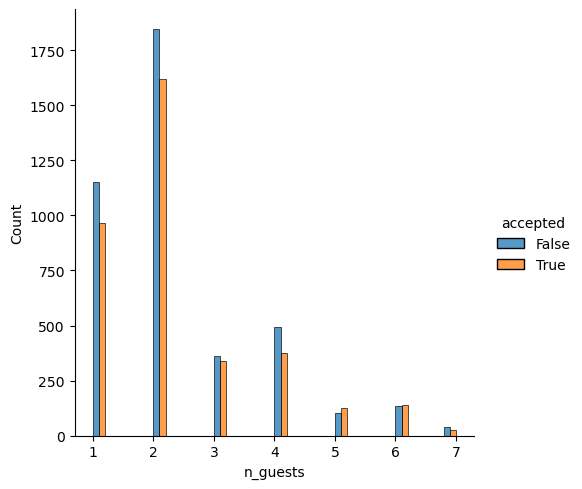

In [30]:
#Number of guests stayed

contacts_less8 = contacts[contacts["n_guests"]<8]
plt.figure(figsize=(8,4))
sns.displot(contacts_less8, x="n_guests", hue="accepted", multiple="dodge")
plt.show()

2 guests is the most popular option to book, but 1 guest is the most popularly searched option. This leads me to believe there is a lack of supply of viable single guest rooms.

I was also wondering how many acceptance actually is converted into booking the room.

In [31]:
#Conversion rate from accepting to booking

contacts["ts_booking_at"].count()/contacts["ts_accepted_at"].count()

0.5993934381031155

As seen before during the common check-in dates, the popular dates are October-December.

Finding if there happen to be major difference between people rejected vs accepted.

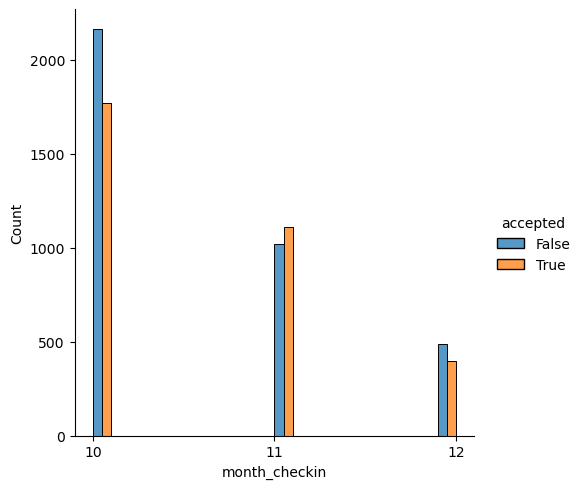

In [32]:
#Timeframe of when guests or accepted vs rejected
contacts["month_checkin"] = contacts["ds_checkin"].dt.month #Extract month from checkin date
contact_checkin = contacts[contacts["month_checkin"]>9] #Use only peak season months (Oct, Nov, Dec)

#Distribution of checkin among October, November, and December and split by acceptance
sns.displot(contact_checkin, x="month_checkin", hue="accepted", multiple="dodge")
plt.xticks([10,11,12])
plt.show()


here does not appear to be any major variation between accepted vs rejected users

Often you have to merge datasets to get perform faster analysis. We'll merge the searches and contacts datasets for further analysis.

In [33]:
#Merge datasets for more analysis

merged_datasets = contacts.merge(searches, left_on='id_guest', right_on='id_user')

Let's check if the maximum price people are willing to pay affects the acceptance/rejection rates.

To further help better visualize the trend we set the filter price max as less or equal to 600. 600 was chosen as the limit since only 14.25% of the dataset has values greater than 600.

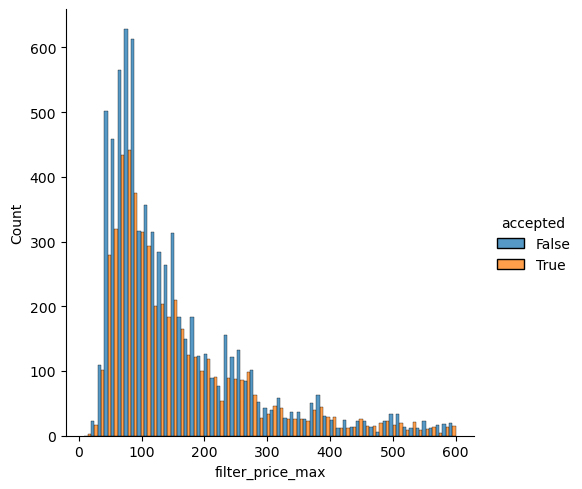

In [34]:
#Check difference between prices searched between accepted/rejected applicants

merged_pricemax_filter = merged_datasets.loc[(merged_datasets['filter_price_max'] <= 600)]

sns.displot(merged_pricemax_filter, x="filter_price_max", hue="accepted", multiple="dodge")
plt.show()

In [35]:
#Classify dataset based on filter_price_max

def label_price (row):
    if (row['filter_price_max'] >= 0) & (row['filter_price_max'] < 100):
        return '0-100'
    
    elif (row['filter_price_max'] >= 100) & (row['filter_price_max'] < 200):
        return '100-200'

    elif (row['filter_price_max'] >= 200) & (row['filter_price_max'] < 300):
        return '200-300'
    
    elif (row['filter_price_max'] >= 300) & (row['filter_price_max'] < 400):
        return '300-400'

    elif (row['filter_price_max'] >= 400) & (row['filter_price_max'] < 500):
        return '400-500'
    
    elif (row['filter_price_max'] >= 500) & (row['filter_price_max'] < 600):
        return '500-600'
    
    else:
        return '600+'
    
merged_datasets['classification_max_price'] = merged_datasets.apply(lambda row: label_price(row), axis=1)

merged_datasets.groupby('classification_max_price').agg({'accepted': 'mean'})

,accepted
classification_max_price,
0-100,0.411160
100-200,0.430308
200-300,0.431149
300-400,0.450488
400-500,0.485549
500-600,0.422297
600+,0.433122


Based on this table, it can be seen that regardless of max_filter_price, people are rejected at similar rates around 43%

One of the few details the Airbnb hosts see about the potential guests is their hometown from their profile information.

I'm curious to see if there is any difference in the acceptance rate by country.

In [36]:
#Find the acceptance rate by country

dataset_country = merged_datasets[['origin_country', 'accepted']]

#Find acceptance count by country and accepted
accepted_count = dataset_country.groupby(['origin_country', 'accepted']).agg({'origin_country':'count'})
accepted_count.columns = ['count_accepted']

#Find acceptance count by country
country_count = dataset_country.groupby(['origin_country']).agg({'origin_country':'count'})
country_count.columns = ['count_country']

#Merge datasets for easier manipulation 
acceptance_country = pd.merge(dataset_country, accepted_count,  how='left', on=['origin_country','accepted']) #Merge accepted count
acceptance_country = acceptance_country.drop_duplicates()

acceptance_country = pd.merge(acceptance_country, country_count, how='left', on=['origin_country']) #Merge total country count
acceptance_country = acceptance_country.sort_values(['count_country', 'accepted'], ascending = [False, True])
acceptance_country = acceptance_country[acceptance_country['count_country'] >= 100] #100 is used so there is a good amount of data to make assumptions
acceptance_country = acceptance_country[acceptance_country['accepted'] == True]

#Divide count_accepted column by count_country column to find acceptance rate by country
acceptance_country['acceptance_rate'] = acceptance_country['count_accepted']/acceptance_country['count_country']
acceptance_country.sort_values(['acceptance_rate'], ascending = True)

,origin_country,accepted,count_accepted,count_country,acceptance_rate
73,IN,True,138,874,0.157895
55,HR,True,159,530,0.300000
72,AT,True,83,239,0.347280
54,RU,True,83,239,0.347280
11,IT,True,1183,3137,0.377112
100,AE,True,59,154,0.383117
0,CA,True,407,993,0.409869
13,IE,True,1217,2951,0.412403
24,ES,True,794,1914,0.414838
49,RO,True,50,118,0.423729


An interesting point is that India only has the lowest acceptance rate of 15%, which is half of the acceptance rate compared to the second lowest accepted country.

There could be a potential market in Denmark, which can be seen through the highest acceptance rate but low application numbers. Increasing marketing in this country could increase demand.
